<a href="https://colab.research.google.com/github/kapilpriya01/priya-kapil/blob/master/Rf_DT/Recall_Question_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT
## PORTUGUESE INSTITUTIONS BANK MARKETING (RECALL CASE)


##  Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
 
### FALSE POSITIVE & FALSE NEGATIVE AND IT'S IMPACT ON BUSINESS
__FALSE POSITIVE__ - The events which are __predicted__ to happen but they __don't occur in real life__. Here in the context of dataset and business involved, the false positive results in predicted term deposit by customers ont he basis of phone marketing, but they actually do not turn up to make the term deposit.<br/>
__FALSE NEGATIVE__ - The events which are __not predicted__ to happen but they __do occur in real life__. In this case the prediction is made as the customer will not be making term deposit but they do actually make the term deposit.

So, concluding from the above two case, we need to __cater/ lower down the False negative__ becasue in any business we cannot __assume__ customer will have prior knowledge of our products and services. Even though they know, we need to do the marketing in order to not loose a single customer .
 

### Import the dataset

In [1]:
import pandas as pd
bank = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/bank.csv')
bank.head() 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,329,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,29,admin.,single,university.degree,no,no,no,cellular,may,wed,132,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
2,50,management,married,university.degree,no,yes,yes,cellular,apr,fri,206,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,31,admin.,married,high.school,unknown,yes,no,telephone,may,thu,199,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4,32,admin.,single,high.school,no,yes,no,cellular,jun,tue,350,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


### Check the columns present in the dataset

In [2]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Check the shape of Dataset

In [3]:
bank.shape 

(10297, 21)

### Check the descriptive statistics of the dataset

In [4]:
bank.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000
mean,40.080606,261.388268,2.561134,963.609692,0.171506,0.077256,93.574206,-40.445780,3.621923,5166.850442
std,10.472190,263.722874,2.827084,184.098592,0.496992,1.576732,0.577502,4.622221,1.734170,72.492914
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,327.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,94.000000,3643.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Check the info of the dataset

In [5]:
bank.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10297 entries, 0 to 10296
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10297 non-null  int64  
 1   job             10297 non-null  object 
 2   marital         10297 non-null  object 
 3   education       10297 non-null  object 
 4   default         10297 non-null  object 
 5   housing         10297 non-null  object 
 6   loan            10297 non-null  object 
 7   contact         10297 non-null  object 
 8   month           10297 non-null  object 
 9   day_of_week     10297 non-null  object 
 10  duration        10297 non-null  int64  
 11  campaign        10297 non-null  int64  
 12  pdays           10297 non-null  int64  
 13  previous        10297 non-null  int64  
 14  poutcome        10297 non-null  object 
 15  emp.var.rate    10297 non-null  float64
 16  cons.price.idx  10297 non-null  float64
 17  cons.conf.idx   10297 non-null 

### Count of Yes and No for the term deposit

In [6]:
bank.y.value_counts()

no     9137
yes    1160
Name: y, dtype: int64

### Q 1. Write a code to check the missing values present in the dataset.

In [8]:
def me():
    # your code to print the count of missing values
    print(bank.isnull().sum())
me()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Q 2. Write a user defined function to calculate the Inter quartile range for quantile values outside 25 to 75 range. And do the outlier capping for lower level with min value and for upper level with 'q3=1.5*iqr' value.

In [0]:
def remove_outlier(df_in, col_name):
    # Calculate quantile 1 using quantile(0.25)
    q1 = df_in[col_name].quantile(0.25)
    # Calculate quantile 3
    q3 = df_in[col_name].quantile(0.75)
    # Calculate IQR as difference of Quantile 3 and quantile 1
    iqr = q3 - q1
    # Find the lower bound using the min() function
    lower_bound = df_in[col_name].min()
    # Find the upper bound as quantile3 + 1.5*IQR
    upper_bound = q3 + 1.5*iqr
    # Print the lower and upper bound of the column
    print("lower_bound: {} {}".format(col_name,lower_bound))
    print("upper_bound: {} {}".format(col_name,upper_bound))
    # Remove the values lying outside min and upper bound range
    df_out = df_in.loc[(df_in[col_name] > lower_bound) & (df_in[col_name] < upper_bound)]
    return df_out

### Q 2.1 Using the above created function , remove the outlier from 'age' variables:

In [14]:
def me(bank):
    return remove_outlier(bank,'age') # your code to remove outlier from age
bank = me(bank) 

lower_bound: age 18
upper_bound: age 69.5


### Q 2.2 Using the above created function , remove the outlier from 'campaign' variables:

In [15]:
def me(bank):
    return remove_outlier(bank,'campaign') # your code to remove outlier from campaign
bank = me(bank) 

lower_bound: campaign 1
upper_bound: campaign 6.0


### Q 2.3 Using the above created function , remove the outlier from 'duration' variables:

In [16]:
def me(bank):
    return remove_outlier(bank,'duration') # your code to remove outlier from duration
bank = me(bank) 

lower_bound: duration 0
upper_bound: duration 684.0


### Dividing dataset into two, on the basis of categorical and numerical.

In [0]:
bank_cat=bank[['job', 'marital','default', 'education', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'y']]

In [0]:
bank_cont = bank.drop(['job', 'marital','default', 'education', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], axis=1)

### Q 3. Label encode the below mentioned categorical variable to numerical values.
``` ['job', 'marital','default', 'education', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] ```

In [0]:
from sklearn.preprocessing import LabelEncoder

In [31]:
def me(bank_cat):
    return bank_cat.apply(LabelEncoder().fit_transform) # your code to return the value applying fit_transorm
bank_cat = me(bank_cat)
bank_cat.head()

,job,marital,default,education,loan,housing,contact,month,day_of_week,poutcome,y
0,1,1,0,2,2,0,1,6,3,1,0
1,0,2,0,6,0,0,0,6,4,1,0
3,0,1,1,3,0,2,1,6,2,1,0
5,0,2,0,6,2,2,0,1,1,1,0
8,1,1,1,5,0,0,0,6,4,0,0


In [32]:
type(bank_cat)

pandas.core.frame.DataFrame

### Combining the numerical and categorical dataset.

In [0]:
bank_final= pd.concat([bank_cont, bank_cat], axis = 1)

In [37]:
bank_final.shape

(4621, 21)

### Q 4. Extract the independent columns to prepare X 

In [36]:
X = pd.DataFrame()
def me():
    # write your code to create a dataframe of dependent variables excluding 'y' variable
    X = bank_final.loc[:, bank_final.columns != 'y']
    return X
X = me()
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,default,education,loan,housing,contact,month,day_of_week,poutcome
0,46,329,3,999,0,1.1,93.994,-36.4,4.857,5191.0,1,1,0,2,2,0,1,6,3,1
1,29,132,2,999,0,-1.8,92.893,-46.2,1.281,5099.1,0,2,0,6,0,0,0,6,4,1
3,31,199,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,1,1,3,0,2,1,6,2,1
5,33,174,4,999,0,1.4,93.444,-36.1,4.963,5228.1,0,2,0,6,2,2,0,1,1,1
8,34,65,2,999,1,-1.8,92.893,-46.2,1.281,5099.1,1,1,1,5,0,0,0,6,4,0


In [38]:
X.shape

(4621, 20)

### Q 5. Extract dependent column into a dataframe 'y' for model prediction

In [0]:
y = pd.DataFrame()
def me():
    y = bank_final.y
    # write your code to create a dataframe which consists only of dependepent variable
    return y
y = me()

In [40]:
y.shape

(4621,)

### Q 6. Splitting X and y into train and test dataset

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
def log():
    return train_test_split(X,y,random_state =1, test_size = 0.25) # train test split using train_test_split of 75:25 and random state=1
X_train, X_test, y_train, y_test = log()

### Check the shape of X an y of train dataset.

In [43]:
def me():
    print(X_train.shape)
    print(y_train.shape)
me()

(3465, 20)
(3465,)


### Check the shape of X and y of test dataset.

In [44]:
def me():
    print(X_test.shape)
    print(y_test.shape)
me()

(1156, 20)
(1156,)


### Q 7. Instantiate RandomForestClassifier using scikit-learn with (n_estimators=600)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
def me():
    rf = RandomForestClassifier()
    # instantiate RandomForestClassifer to new variable rf
    return rf
rf = me()

### Q 8. Fit the model

In [47]:
def me():
    return rf.fit(X_train,y_train) # fit the X_train and y_train
me()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Q 9. Use the model for predictions

In [0]:
predictions_new = pd.DataFrame()
def me():
    # create the model prediction on X_test data using the above created dataframe
    predictions_new = rf.predict(X_test)
    return predictions_new
predictions_new = me()

### Q 10. Model evaluation using accuracy score

In [49]:
from sklearn.metrics import accuracy_score
def me():
    # Compute and print the accuracy score
    print("accuracy_score: ", accuracy_score(y_test,predictions_new))
me()

accuracy_score:  0.9411764705882353


### Q 11. Model evaluation using confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predictions_new))

In [51]:
def me():
    # provide confusion matrix index name as['Actual No_Deposit','Actual Deposit']
    # provide confusion matrix index name as['Predicted No_Deposit','Predicted Deposit']
    # print the confusion matrix
    confusion_matrix.index = ['Actual No_Deposit','Actual Deposit']
    confusion_matrix.columns = ['Predicted No_Deposit','Predicted Deposit']
    print(confusion_matrix)
me()

                   Predicted No_Deposit  Predicted Deposit
Actual No_Deposit                  1057                 19
Actual Deposit                       49                 31


### Q 12. Model evaluation using Precision score

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [54]:
def me():
    # Compute and print the precision score
  print(precision_score(y_test,predictions_new))
me()

0.62


### Q 13. Model evaluation using Recall score

In [55]:
def me():
    # Compute the recall
    # print the recall
    recall = recall_score(y_test,predictions_new)
    print(recall)
    return recall
recall = me()

0.3875


### Q 14. Model evaluation using F1-score

In [56]:
def me():
    # Compute and print the f1_score
    print(f1_score(y_test,predictions_new))
me()

0.4769230769230769


### Q 15. Model evaluation using ROC_AUC score

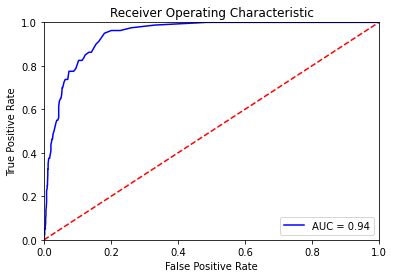

0.9431633364312269

In [61]:
def me():
    # predict class probabilites fro X_test
    # return the array value as pred
    # Compute roc_curve as fpr1, tpr1, threshold
    # compute roc_auc as roc_auc1
    probs = rf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc1 = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc1)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc1
me()

### Q 16.1. Instantiate RandomForestClassifier using scikit-learn with (criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5, class_weight='balanced')

In [0]:
from sklearn.ensemble import RandomForestClassifier
def me():
    # instantiate RandomForestClassifier as rfc
    rfc = RandomForestClassifier (criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5, class_weight='balanced')
    return rfc
rfc = me()

### 16.2. Fit the model

In [63]:
def me():
    return rfc.fit(X_train,y_train) # fit the X_train and y_train
me()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Q 16.3. Use the model for predictions

In [0]:
predictions = pd.DataFrame()
def me():
    # create the model prediction on X_test data using the above created dataframe
    predictions = rfc.predict(X_test)
    return predictions
predictions = me()

### Q 16.4. Model evaluation using accuracy score

In [65]:
from sklearn.metrics import accuracy_score
def me():
    # compute and print the accuracy score
    print("AccurCY sCORE: ",accuracy_score(y_test,predictions))
me()

AccurCY sCORE:  0.8762975778546713


### Q 16.5. Model evaluation using confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predictions))
def me():
    # provide confusion matrix index name as['Actual No_Deposit','Actual Deposit']
    confusion_matrix.index = ['Actual No_Deposit','Actual Deposit']
    # provide confusion matrix index name as['Predicted No_Deposit','Predicted Deposit']
    confusion_matrix.columns = ['Predicted No_Deposit','Predicted Deposit']
    # print the confusion matrix
    print(confusion_matrix)
me()

                   Predicted No_Deposit  Predicted Deposit
Actual No_Deposit                   961                115
Actual Deposit                       28                 52


### Q 16.6. Model evaluation using Precision score

In [68]:
from sklearn.metrics import precision_score
def me():
    # compute and print the precision score
    print(precision_score(y_test,predictions))
me()

0.31137724550898205


### Q 16.7. Model evaluation using Recall score

In [69]:
from sklearn.metrics import recall_score
def me():
    # compute the recall score
    # print the recall score
    recall1 = recall_score(y_test,predictions)
    print(recall1)
    return recall1
recall1 = me()

0.65


### Q 16.8. Model evaluation using F1-score

In [70]:
from sklearn.metrics import f1_score
def me():
    # compute and print the f1_score
    print(f1_score(y_test,predictions))
me()

0.4210526315789474


### Q 16.9. Model evaluation using ROC_AUC curve

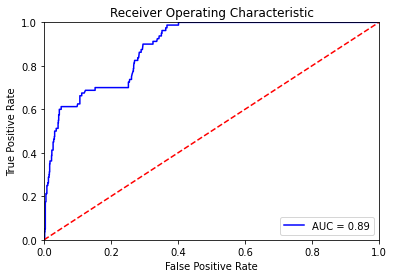

0.8887256040892194

In [71]:
from sklearn import metrics
def me():
    # predict class probabilites fro X_test
    # return the array value as preds
    # Compute roc_curve as fpr, tpr, threshold
    # compute roc_auc

    probs = rfc.predict_proba(X_test)
    pred = probs[:,1]
    fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr1, tpr1)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc
me()

### Q 17. What is the inference you can draw from 2 different models on the basis of recall score (provide the absolute score).

In [73]:
def log():
    # calculate teh difference between recall1 and recall created by two two different models and assign it to variable
    print(recall1,recall)
    return recall1-recall # created varibale
log()

0.65 0.3875


0.2625

### Conclusion 
In this use case, the company stands to loose more if '__False Negative__' is not treated properly.
Recall value of our first model in __Q.no.- 13__ is way lower than the other model created in __Q.no.-16__.
Therefore, __second model__ is a better option for bank marketing.